In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv("news.csv")
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [145]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [146]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [147]:
data.shape

(6335, 3)

In [148]:
data.drop('title',axis=1,inplace=True)
data.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [149]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [150]:
data.isnull().sum()   #no null values in the dataset

text     0
label    0
dtype: int64

In [151]:
data.duplicated()   #no duplicated values in the dataset

0       False
1       False
2       False
3       False
4       False
        ...  
6330    False
6331    False
6332    False
6333    False
6334    False
Length: 6335, dtype: bool

In [152]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [153]:
data.label=le.fit_transform(data.label)
data.head()  

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.text,data.label,test_size=0.2,random_state=1)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5068,)
(1267,)
(5068,)
(1267,)


## CountVectorizer

In [156]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating an object for CountVectorizer
count_vect=CountVectorizer()

In [157]:
# generate the word counts for the words in the documents
word_count_vect = count_vect.fit(X_train)

#to get feature names
word_count_vect.get_feature_names()

/Users/yasasvithati/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '000000031',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000billion',
 '000ft',
 '000km',
 '000x',
 '001',
 '0011',
 '003',
 '004',
 '005',
 '005s',
 '006',
 '006s',
 '007',
 '007s',
 '008s',
 '009',
 '00am',
 '00p',
 '00pm',
 '01',
 '010',
 '012',
 '013',
 '013c2812c9',
 '014',
 '015',
 '016',
 '018',
 '01am',
 '02',
 '020',
 '022',
 '023',
 '024',
 '025',
 '027',
 '02714',
 '028',
 '02870',
 '03',
 '030',
 '031',
 '0325',
 '033',
 '034',
 '035',
 '03747',
 '039',
 '04',
 '040',
 '0400',
 '042',
 '044',
 '047',
 '048',
 '049',
 '04pm',
 '05',
 '050',
 '052',
 '053',
 '056',
 '058',
 '06',
 '0600',
 '062',
 '063',
 '066',
 '068',
 '06pm',
 '07',
 '075',
 '0750',
 '079',
 '08',
 '080',
 '082',
 '084',
 '0843',
 '085',
 '0851',
 '0891',
 '09',
 '091',
 '093',
 '098263',
 '09am',
 '09pm',
 '0_65b67362bd',
 '0_kvyhphja',
 '0hour',
 '0hq3vb2giv',
 '0in',
 '0oeekvljlt',
 '0pt',
 '0womdwalmi',
 '10',
 '100',
 '1000',
 '10000s',
 '1000s',
 '1001',
 '100515p

In [158]:
doc_array=word_count_vect.transform(X_train)
doc_array

<5068x61502 sparse matrix of type '<class 'numpy.int64'>'
	with 1732321 stored elements in Compressed Sparse Row format>

In [159]:
#converting to an array
doc_array=word_count_vect.transform(X_train).toarray()
doc_array

array([[ 0, 13,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [160]:
#converting to a dataframe
feature_matrix=pd.DataFrame(doc_array,columns=word_count_vect.get_feature_names())
feature_matrix

,00,000,0000,000000031,00000031,000035,00006,0001,0001pt,000billion,...,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي,ยงade
0,0,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
#applying fit_transform to the x_train data ie. input train data

X_train_transformed1=count_vect.fit_transform(X_train)
X_train_transformed1

<5068x61502 sparse matrix of type '<class 'numpy.int64'>'
	with 1732321 stored elements in Compressed Sparse Row format>

In [162]:
#applying transform method to x_test data ie. output test data

X_test_transformed1=count_vect.transform(X_test)
X_test_transformed1

<1267x61502 sparse matrix of type '<class 'numpy.int64'>'
	with 419437 stored elements in Compressed Sparse Row format>

In [163]:
count_vect.get_feature_names()

/Users/yasasvithati/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '000000031',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000billion',
 '000ft',
 '000km',
 '000x',
 '001',
 '0011',
 '003',
 '004',
 '005',
 '005s',
 '006',
 '006s',
 '007',
 '007s',
 '008s',
 '009',
 '00am',
 '00p',
 '00pm',
 '01',
 '010',
 '012',
 '013',
 '013c2812c9',
 '014',
 '015',
 '016',
 '018',
 '01am',
 '02',
 '020',
 '022',
 '023',
 '024',
 '025',
 '027',
 '02714',
 '028',
 '02870',
 '03',
 '030',
 '031',
 '0325',
 '033',
 '034',
 '035',
 '03747',
 '039',
 '04',
 '040',
 '0400',
 '042',
 '044',
 '047',
 '048',
 '049',
 '04pm',
 '05',
 '050',
 '052',
 '053',
 '056',
 '058',
 '06',
 '0600',
 '062',
 '063',
 '066',
 '068',
 '06pm',
 '07',
 '075',
 '0750',
 '079',
 '08',
 '080',
 '082',
 '084',
 '0843',
 '085',
 '0851',
 '0891',
 '09',
 '091',
 '093',
 '098263',
 '09am',
 '09pm',
 '0_65b67362bd',
 '0_kvyhphja',
 '0hour',
 '0hq3vb2giv',
 '0in',
 '0oeekvljlt',
 '0pt',
 '0womdwalmi',
 '10',
 '100',
 '1000',
 '10000s',
 '1000s',
 '1001',
 '100515p

In [164]:
count_vect.vocabulary_

{'october': 38565,
 '31': 958,
 '2016': 671,
 'fort': 21842,
 'russ': 47312,
 'aleksandr': 3199,
 'khrolenko': 30528,
 'ia': 26845,
 'analytics': 3736,
 'translated': 55571,
 'by': 9031,
 'arnoldski': 4646,
 'hardly': 24908,
 'day': 14413,
 'goes': 23533,
 'without': 59980,
 'foreign': 21721,
 'media': 34553,
 'circulating': 10923,
 'the': 54430,
 'false': 20287,
 'accusations': 2272,
 'that': 54420,
 'leadership': 31716,
 'of': 38602,
 'syrian': 53479,
 'arab': 4425,
 'republic': 45847,
 'is': 28908,
 'guilty': 24322,
 'deaths': 14509,
 'hundreds': 26641,
 'thousands': 54688,
 'and': 3775,
 'even': 19445,
 'millions': 35281,
 'syrians': 53480,
 'authoritative': 5349,
 'international': 28484,
 'organizations': 39088,
 'are': 4517,
 'cited': 10961,
 'as': 4793,
 'sources': 51029,
 'dissemination': 16519,
 'such': 52730,
 'information': 27932,
 'in': 27424,
 'july': 29883,
 '2013': 668,
 'according': 2241,
 'to': 55046,
 'un': 56508,
 'secretary': 48597,
 'general': 22882,
 'ban': 5935,


In [165]:
#apply naivve bayes algorithm

#import BernNB
from sklearn.naive_bayes import BernoulliNB

#creating an obj for BernNB
model_BernNB1=BernoulliNB()

In [166]:
#applying algorithm to data
#objname.fit(input,output)
model_BernNB1.fit(X_train_transformed1,y_train)

BernoulliNB()

## Predicting on train data


In [167]:
#prediction on train data
#syntax: objname.predict(Inputvallues)
y_train_pred1=model_BernNB.predict(X_train_transformed1)

In [168]:
#compare the actual values(y_train) with predicted values(y_train_pred1)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train,y_train_pred1)

array([[2324,  189],
       [ 595, 1960]])

<AxesSubplot:>

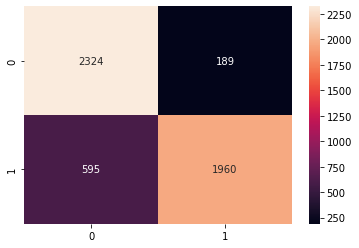

In [169]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred1),annot=True,fmt='3.0f')

In [170]:
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2513
           1       0.91      0.77      0.83      2555

    accuracy                           0.85      5068
   macro avg       0.85      0.85      0.84      5068
weighted avg       0.85      0.85      0.84      5068



## Predicting on test data


In [171]:
#prediction on test data
#syntax: objname.predict(Inputvallues)
y_test_pred1=model_BernNB.predict(X_test_transformed1)

In [172]:
#compare the actual values(y_test) with predicted values(y_test_pred1)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_test_pred1)

array([[563,  88],
       [129, 487]])

<AxesSubplot:>

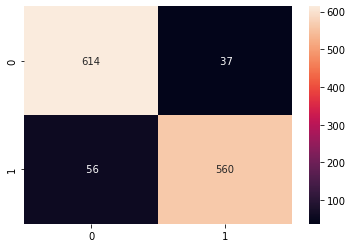

In [173]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f')

In [174]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       651
           1       0.85      0.79      0.82       616

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



## Tfidf Vectorizer

In [175]:
#TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize an object for tfidf vectorizer
tfidf=TfidfVectorizer()

In [176]:
# apply the fit_transform method on x_train ie. the input train data
X_train_transformed=tfidf.fit_transform(X_train)
X_train_transformed

<5068x61502 sparse matrix of type '<class 'numpy.float64'>'
	with 1732321 stored elements in Compressed Sparse Row format>

In [177]:
# apply the transform method on x_test ie. the input test data

X_test_transformed=tfidf.transform(X_test)
X_test_transformed

<1267x61502 sparse matrix of type '<class 'numpy.float64'>'
	with 419437 stored elements in Compressed Sparse Row format>

In [178]:
#feature names
tfidf.get_feature_names() 

/Users/yasasvithati/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '000000031',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000billion',
 '000ft',
 '000km',
 '000x',
 '001',
 '0011',
 '003',
 '004',
 '005',
 '005s',
 '006',
 '006s',
 '007',
 '007s',
 '008s',
 '009',
 '00am',
 '00p',
 '00pm',
 '01',
 '010',
 '012',
 '013',
 '013c2812c9',
 '014',
 '015',
 '016',
 '018',
 '01am',
 '02',
 '020',
 '022',
 '023',
 '024',
 '025',
 '027',
 '02714',
 '028',
 '02870',
 '03',
 '030',
 '031',
 '0325',
 '033',
 '034',
 '035',
 '03747',
 '039',
 '04',
 '040',
 '0400',
 '042',
 '044',
 '047',
 '048',
 '049',
 '04pm',
 '05',
 '050',
 '052',
 '053',
 '056',
 '058',
 '06',
 '0600',
 '062',
 '063',
 '066',
 '068',
 '06pm',
 '07',
 '075',
 '0750',
 '079',
 '08',
 '080',
 '082',
 '084',
 '0843',
 '085',
 '0851',
 '0891',
 '09',
 '091',
 '093',
 '098263',
 '09am',
 '09pm',
 '0_65b67362bd',
 '0_kvyhphja',
 '0hour',
 '0hq3vb2giv',
 '0in',
 '0oeekvljlt',
 '0pt',
 '0womdwalmi',
 '10',
 '100',
 '1000',
 '10000s',
 '1000s',
 '1001',
 '100515p

In [179]:
#position of words in sparse matrix
tfidf.vocabulary_

{'october': 38565,
 '31': 958,
 '2016': 671,
 'fort': 21842,
 'russ': 47312,
 'aleksandr': 3199,
 'khrolenko': 30528,
 'ia': 26845,
 'analytics': 3736,
 'translated': 55571,
 'by': 9031,
 'arnoldski': 4646,
 'hardly': 24908,
 'day': 14413,
 'goes': 23533,
 'without': 59980,
 'foreign': 21721,
 'media': 34553,
 'circulating': 10923,
 'the': 54430,
 'false': 20287,
 'accusations': 2272,
 'that': 54420,
 'leadership': 31716,
 'of': 38602,
 'syrian': 53479,
 'arab': 4425,
 'republic': 45847,
 'is': 28908,
 'guilty': 24322,
 'deaths': 14509,
 'hundreds': 26641,
 'thousands': 54688,
 'and': 3775,
 'even': 19445,
 'millions': 35281,
 'syrians': 53480,
 'authoritative': 5349,
 'international': 28484,
 'organizations': 39088,
 'are': 4517,
 'cited': 10961,
 'as': 4793,
 'sources': 51029,
 'dissemination': 16519,
 'such': 52730,
 'information': 27932,
 'in': 27424,
 'july': 29883,
 '2013': 668,
 'according': 2241,
 'to': 55046,
 'un': 56508,
 'secretary': 48597,
 'general': 22882,
 'ban': 5935,


In [180]:
#IDF of the terms
tfidf.idf_

array([5.57965512, 2.63420451, 8.83775166, ..., 8.83775166, 8.43228655,
       8.83775166])

In [181]:
#apply naivve bayes algorithm

#import BernNB
from sklearn.naive_bayes import BernoulliNB

#creating ann obj for BernNB
model_BernNB=BernoulliNB()

In [182]:
#applying algorithm to data
#objname.fit(input,output)
model_BernNB.fit(X_train_transformed,y_train)

BernoulliNB()

## Predicting on train data

In [183]:
#prediction on train data
#syntax: objname.predict(Inputvallues)
y_train_pred=model_BernNB.predict(X_train_transformed)

In [184]:
#compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train,y_train_pred)

array([[2324,  189],
       [ 595, 1960]])

<AxesSubplot:>

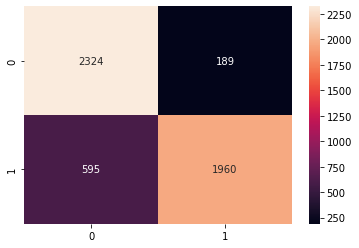

In [185]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f')

In [186]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2513
           1       0.91      0.77      0.83      2555

    accuracy                           0.85      5068
   macro avg       0.85      0.85      0.84      5068
weighted avg       0.85      0.85      0.84      5068



## Predicting on test data

In [187]:
#prediction on test data
#syntax: objname.predict(Inputvallues)
y_test_pred=model_BernNB.predict(X_test_transformed)

In [188]:
#compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_test_pred)

array([[563,  88],
       [129, 487]])

<AxesSubplot:>

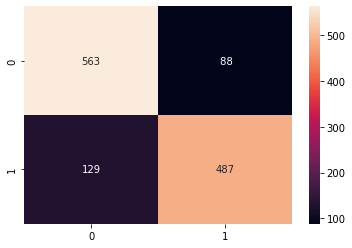

In [189]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f')

In [190]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       651
           1       0.85      0.79      0.82       616

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



In [191]:
#test a single message
new_message= pd.Series('Last few days to collect the free\
                    entry passes with 40% discount')
# calculate tfidf values for the new message
new_message_transformed=tfidf.transform(new_message)

In [192]:
#predict the new message
model_BernNB.predict(new_message_transformed)

array([0])

# LOGISTIC REGRESSION

In [193]:
# import TfidfVectorizer and create an object

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
y=data.label.values
X=tfidf.fit_transform(data.text)

In [194]:
# splitting the dataset into train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [195]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5068, 67659)
(1267, 67659)
(5068,)
(1267,)


In [196]:
# import LogisticRegression and create an object

from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

## Predicting on train data


In [197]:
#predicting on training data
#syntax: ObjectName.predict(input)
y_train_pred= reg.predict(X_train)
y_train_pred

array([0, 0, 1, ..., 1, 0, 0])

In [198]:
#confusion matrix for training data
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_train,y_train_pred)
conf

array([[2410,  103],
       [ 152, 2403]])

<AxesSubplot:>

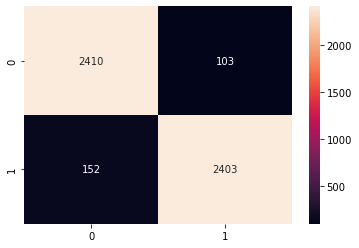

In [199]:
#visualizing confusion matrix
sns.heatmap(conf,annot=True,fmt='3.0f')

In [200]:
true_negative=conf[0][0]
false_positive=conf[0][1]
false_negative=conf[1][0]
true_positive=conf[1][1]

In [201]:
##accuracy--> TP+TN/TP+FP+TN+FN
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.9496842936069455

In [202]:
#precision rate
Precision=true_positive/(true_positive+false_positive)
Precision

0.9588986432561851

In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2513
           1       0.96      0.94      0.95      2555

    accuracy                           0.95      5068
   macro avg       0.95      0.95      0.95      5068
weighted avg       0.95      0.95      0.95      5068



## Predicting on test data

In [204]:
#predicting on testing data
#syntax: ObjectName.predict(input)
y_test_pred= reg.predict(X_test)
y_test_pred

array([1, 0, 0, ..., 0, 1, 1])

In [205]:
#confusion matrix for training data
from sklearn.metrics import confusion_matrix
test_conf=confusion_matrix(y_test,y_test_pred)
test_conf

array([[614,  37],
       [ 56, 560]])

<AxesSubplot:>

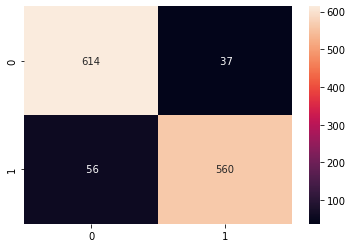

In [206]:
#visualizing confusion matrix
sns.heatmap(test_conf,annot=True,fmt='3.0f')

In [207]:
test_true_negative=test_conf[0][0]
test_false_positive=test_conf[0][1]
test_false_negative=test_conf[1][0]
test_true_positive=test_conf[1][1]

In [208]:
##accuracy--> TP+TN/TP+FP+TN+FN
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.9265982636148382

In [209]:
#precision rate
test_Precision=test_true_positive/(test_true_positive+test_false_positive)
test_Precision

0.9380234505862647

In [210]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       651
           1       0.94      0.91      0.92       616

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [211]:
#test a single message
new_message= pd.Series('obama was the president')
# calculate tfidf values for the new message
new_message_transformed=tfidf.transform(new_message)

In [212]:
#predict the new message
reg.predict(new_message_transformed)

array([1])

### Got the output as 1 which indicates the news is real